# Sentiment Analysis on IMDB Movie Review Using Multinomial Naive Bayes

[Dataset](https://www.kaggle.com/code/manishthem/sentiment-analysis-imdb-50k-dataset-91-accuracy/data?select=IMDB+Dataset.csv) can be downloaded here

## Import Library

In [1]:
import numpy as np
import pandas as pd
import re 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Load Dataset

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
#lemmatizer = nltk.stem.WordNetLemmatizer()

processed_review = []
sinlge_review = 'string to iniialize <br /> my email id is charilie@waoow.com. You can also reach to me at charlie'
reviews = df.review
for review in range (0,50000):
  single_review = df.loc[review,'review']

  # remove html tags
  single_review = re.sub('<.*?>',' ',single_review)
  # remove special char
  single_review = re.sub('\W',' ',single_review)
  # removing single char
  single_review = re.sub('\s+[a-zA-Z]\s+',' ', single_review)

  # multiple space into single space
  single_review = re.sub('\s+',' ', single_review)

  # remove stopwords
  word_tokens = word_tokenize(single_review)

  filtered_sentence = []
  filtered_sentence2 = " ".join([w for w in word_tokens if w not in stop_words])

  processed_review.append(filtered_sentence2)
print(processed_review[5])


Probably time favorite movie story selflessness sacrifice dedication noble cause preachy boring It never gets old despite seen 15 times last 25 years Paul Lukas performance brings tears eyes Bette Davis one truly sympathetic roles delight The kids grandma says like dressed midgets children makes fun watch And mother slow awakening happening world roof believable startling If dozen thumbs movie


## TF-IDF

### Without Preprocessing

In [ ]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
text_count_matrix = tfidf.fit_transform(df.review)

### With Preprocessing

In [ ]:
text_count_matrix2 = tfidf.fit_transform(processed_review)

## Split Data Train & Data Test

### Without Preprocessing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size = 0.2, random_state = 2)

### With Preprocessing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(text_count_matrix2, df.sentiment, test_size=0.2, random_state=2)

## Converting Sentiment to 0/1

### Without Preprocessing

In [ ]:
y_train = (y_train.replace({'positive': 1, 'negative': 0})).values
y_test = (y_test.replace({'positive': 1, 'negative': 0})).values

### With Preprocessing

In [ ]:
Y_train = (Y_train.replace({'positive': 1, 'negative': 0})).values
Y_test = (Y_test.replace({'positive': 1, 'negative': 0})).values

## Define & Fit Model 

### Without Preprocessing

In [ ]:
MNB = MultinomialNB()
MNB.fit(x_train,y_train)


acc_score = metrics.accuracy_score(MNB.predict(x_test), y_test)
print("accuracy_score without data pre-processing = " + str('{:04.2f}'.format(acc_score*100))+" %")

accuracy_score without data pre-processing = 88.99 %


### With Preprocessing

In [ ]:
MNB2 = MultinomialNB()
MNB2.fit(X_train, Y_train)
#4. Evaluating the model
accuracy_score = metrics.accuracy_score(MNB2.predict(X_test), Y_test)
print("accuracy_score with data pre-processing = " + str('{:04.2f}'.format(accuracy_score*100))+" %")

accuracy_score with data pre-processing = 89.35 %


## Report

### Without Preprocessing

In [ ]:
report1 = classification_report(y_test, MNB.predict(x_test),target_names=['Negative','Positive'])
cm1 = confusion_matrix(y_test, MNB.predict(x_test))
print("Classification Report: \n", report1)
print("Confusion Matrix: \n", cm1)

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.88      0.91      0.89      4979
    Positive       0.90      0.87      0.89      5021

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix: 
 [[4510  469]
 [ 632 4389]]


### With Preprocessing


In [ ]:
report2 =  classification_report(Y_test, MNB2.predict(X_test),target_names=['Negative','Positive'])
cm2 = confusion_matrix(Y_test, MNB2.predict(X_test))
print("Classification Report: \n",report2)
print("Confusion Matrix: \n",cm2 )

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      4979
    Positive       0.89      0.90      0.89      5021

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix: 
 [[4441  538]
 [ 527 4494]]


### Perbandingan Akurasi

Akurasi Tanpa Preprocessing 0.8899
Akurasi Dengan Preprocessing 0.8935


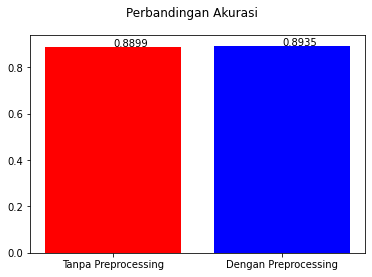

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

print ("Akurasi Tanpa Preprocessing",(acc_score))
print ("Akurasi Dengan Preprocessing",(accuracy_score))

fig = plt.figure()

acc = ['Tanpa Preprocessing', 'Dengan Preprocessing']
val = [(acc_score),(accuracy_score)]


plt.bar(acc,val,color=['r', 'b'])
addlabels(acc,val)
plt.suptitle('Perbandingan Akurasi')




plt.savefig('perbandinganAkurasi.png')
plt.show()

### Perbandingan Jumlah Fitur

Jumlah Fitur Tanpa Preprocessing 743979
Jumlah Fitur Dengan Preprocessing 706924


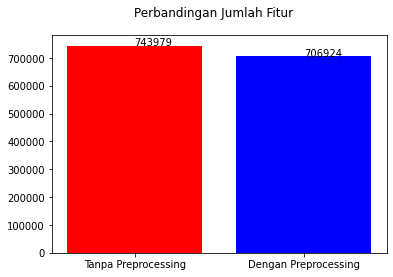

In [ ]:
#without preprocess
jumFitur = text_count_matrix.shape[1]
#with preprocess
jumFitur2 = text_count_matrix2.shape[1]

print ("Jumlah Fitur Tanpa Preprocessing",jumFitur)
print ("Jumlah Fitur Dengan Preprocessing",jumFitur2)

fig = plt.figure()

label = ['Tanpa Preprocessing', 'Dengan Preprocessing']
val = [jumFitur,jumFitur2]

plt.bar(label,val,color=['r', 'b'])
addlabels(label,val)
plt.suptitle('Perbandingan Jumlah Fitur')




plt.savefig('perbandinganJumlahFitur.png')
plt.show()

### Confussion Matrix

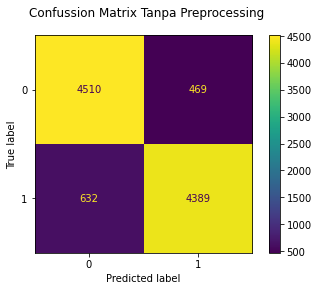

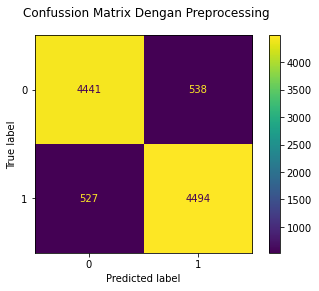

In [ ]:
#Without Preprocessing
plot_confusion_matrix(MNB, x_test, y_test, values_format='')
plt.savefig('Confussion Matrix Tanpa Preprocessing.png')
plt.suptitle('Confussion Matrix Tanpa Preprocessing')
plt.show()

# With Preprocessing
plot_confusion_matrix(MNB2, X_test, Y_test, values_format='')
plt.savefig('Confussion Matrix Dengan Preprocessing.png')
plt.suptitle('Confussion Matrix Dengan Preprocessing')
plt.show()
